In [1]:
import pandas as pd
import numpy as np
import math
import seaborn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
random.seed(15)

seaborn.set(style="white", color_codes=True)
%matplotlib inline

In [2]:
data = pd.read_csv('main.csv')
data.dropna(inplace=True) 
data

,ctrust,cuntrust,last,context,score
0,4,1,4,sport,untrustworthy
1,4,1,4,sport,untrustworthy
2,1,4,4,sport,trustworthy
3,2,1,4,sport,trustworthy
4,3,1,4,sport,trustworthy
...,...,...,...,...,...
317,2,1,2,holiday,untrustworthy
318,1,1,1,holiday,trustworthy
319,1,1,1,holiday,trustworthy
320,1,1,1,holiday,trustworthy


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 321
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ctrust    322 non-null    int64 
 1   cuntrust  322 non-null    int64 
 2   last      322 non-null    int64 
 3   context   322 non-null    object
 4   score     322 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.1+ KB


In [4]:
print('ctrust',data.ctrust.unique())
print('cuntrust',data.cuntrust.unique())
print('last',data['last'].unique())
print('context',data.context.unique())
print('score',data.score.unique())

ctrust [4 1 2 3]
cuntrust [1 4 3 5]
last [4 1 3 2]
context ['sport' 'game' 'ECommerce' 'holiday']
score ['untrustworthy' 'trustworthy']


In [5]:
data['score'].replace({'untrustworthy':0,'trustworthy':1},inplace=True)
data

,ctrust,cuntrust,last,context,score
0,4,1,4,sport,0
1,4,1,4,sport,0
2,1,4,4,sport,1
3,2,1,4,sport,1
4,3,1,4,sport,1
...,...,...,...,...,...
317,2,1,2,holiday,0
318,1,1,1,holiday,1
319,1,1,1,holiday,1
320,1,1,1,holiday,1


In [6]:
data['context'].replace({'sport':1,'game':2,'ECommerce':3,'holiday':4},inplace=True)
data

,ctrust,cuntrust,last,context,score
0,4,1,4,1,0
1,4,1,4,1,0
2,1,4,4,1,1
3,2,1,4,1,1
4,3,1,4,1,1
...,...,...,...,...,...
317,2,1,2,4,0
318,1,1,1,4,1
319,1,1,1,4,1
320,1,1,1,4,1


In [7]:
data.isnull().sum()

ctrust      0
cuntrust    0
last        0
context     0
score       0
dtype: int64

In [8]:
print('ctrust',data.ctrust.unique())
print('cuntrust',data.cuntrust.unique())
print('last',data['last'].unique())
print('context',data.context.unique())
print('score',data.score.unique())

ctrust [4 1 2 3]
cuntrust [1 4 3 5]
last [4 1 3 2]
context [1 2 3 4]
score [0 1]


In [9]:
korelasi = data.corr()
korelasi

,ctrust,cuntrust,last,context,score
ctrust,1.000000,-0.449770,0.092428,-0.493037,0.021177
cuntrust,-0.449770,1.000000,0.373770,-0.170880,-0.268555
last,0.092428,0.373770,1.000000,-0.723423,-0.198514
context,-0.493037,-0.170880,-0.723423,1.000000,-0.202547
score,0.021177,-0.268555,-0.198514,-0.202547,1.000000


In [10]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=data[data.columns[:4]]
Y=data['score']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

context     0.372921
last        0.281464
ctrust      0.230327
cuntrust    0.115288
dtype: float64

In [11]:
X = data.drop(['ctrust','cuntrust','score'], axis=1)
X

,last,context
0,4,1
1,4,1
2,4,1
3,4,1
4,4,1
...,...,...
317,2,4
318,1,4
319,1,4
320,1,4


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 321
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   last     322 non-null    int64
 1   context  322 non-null    int64
dtypes: int64(2)
memory usage: 7.5 KB


In [13]:
print("Jumlah baris = {}".format(X.shape[0]))
print("Jumlah kolom = {}".format(X.shape[1]))

Jumlah baris = 322
Jumlah kolom = 2


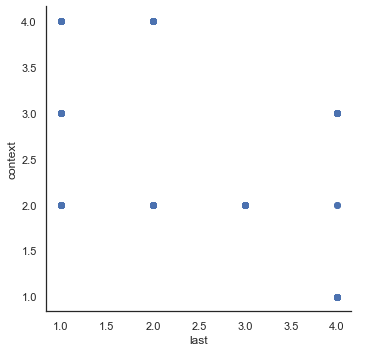

In [14]:
seaborn.FacetGrid(X,height=5) \
   .map(plt.scatter, 'last','context') \
   .add_legend()

In [15]:
cluster_awal = []
jumlah_kluster = 2
n = []
for i in range (jumlah_kluster):
    cek = False
    rnd = round(random.uniform(0,322))
    for j in n:
      if j == rnd:
        cek = True
        i -= 1
    if cek != True:
      n.append(rnd)
      y = [X.iloc[n[i],0],X.iloc[n[i],1]]
      cluster_awal.append(y)
    
print (cluster_awal)

[[1, 4], [4, 1]]


In [16]:
def jarakeuclidean(dtx, dty):
    result = 0
    for i in range(len(dtx)):
        result += math.sqrt(pow((dtx[i]-dty[i]),2))
    return result

In [17]:
def Getdata(df,i):
    get=[X.iloc[i,0],X.iloc[i,1]]
    return get

Clusterke = [[],[],[],[]]
hasilCluster = [[],[],[],[]]
for i in range(len(X)):
  dt = Getdata(X,i)
  print("Centroid :", dt)
  print("Data ke : ",i)
  nilaimin =jarakeuclidean(dt,cluster_awal[0])
  kluster = 0
  print("Cluster ke 0 :", jarakeuclidean(dt,cluster_awal[0]))
  for j in range(1,jumlah_kluster):
    print("Cluster ke ",j,": ", jarakeuclidean(dt,cluster_awal[j]))
    if(jarakeuclidean(dt,cluster_awal[j]) < nilaimin):
      nilaimin = jarakeuclidean(dt,cluster_awal[0])
      kluster = j
  print("Data ke :", i, "masuk pada cluster", kluster,"\n")
  print("=================================================\n")
  Clusterke[kluster].append(i)
  hasilCluster[kluster].append(dt)

Centroid : [4, 1]
Data ke :  0
Cluster ke 0 : 6.0
Cluster ke  1 :  0.0
Data ke : 0 masuk pada cluster 1 


Centroid : [4, 1]
Data ke :  1
Cluster ke 0 : 6.0
Cluster ke  1 :  0.0
Data ke : 1 masuk pada cluster 1 


Centroid : [4, 1]
Data ke :  2
Cluster ke 0 : 6.0
Cluster ke  1 :  0.0
Data ke : 2 masuk pada cluster 1 


Centroid : [4, 1]
Data ke :  3
Cluster ke 0 : 6.0
Cluster ke  1 :  0.0
Data ke : 3 masuk pada cluster 1 


Centroid : [4, 1]
Data ke :  4
Cluster ke 0 : 6.0
Cluster ke  1 :  0.0
Data ke : 4 masuk pada cluster 1 


Centroid : [4, 1]
Data ke :  5
Cluster ke 0 : 6.0
Cluster ke  1 :  0.0
Data ke : 5 masuk pada cluster 1 


Centroid : [4, 1]
Data ke :  6
Cluster ke 0 : 6.0
Cluster ke  1 :  0.0
Data ke : 6 masuk pada cluster 1 


Centroid : [4, 1]
Data ke :  7
Cluster ke 0 : 6.0
Cluster ke  1 :  0.0
Data ke : 7 masuk pada cluster 1 


Centroid : [4, 1]
Data ke :  8
Cluster ke 0 : 6.0
Cluster ke  1 :  0.0
Data ke : 8 masuk pada cluster 1 


Centroid : [4, 1]
Data ke :  9
Cluste

Data ke : 146 masuk pada cluster 0 


Centroid : [1, 2]
Data ke :  147
Cluster ke 0 : 2.0
Cluster ke  1 :  4.0
Data ke : 147 masuk pada cluster 0 


Centroid : [1, 2]
Data ke :  148
Cluster ke 0 : 2.0
Cluster ke  1 :  4.0
Data ke : 148 masuk pada cluster 0 


Centroid : [4, 3]
Data ke :  149
Cluster ke 0 : 4.0
Cluster ke  1 :  2.0
Data ke : 149 masuk pada cluster 1 


Centroid : [1, 3]
Data ke :  150
Cluster ke 0 : 1.0
Cluster ke  1 :  5.0
Data ke : 150 masuk pada cluster 0 


Centroid : [3, 2]
Data ke :  151
Cluster ke 0 : 4.0
Cluster ke  1 :  2.0
Data ke : 151 masuk pada cluster 1 


Centroid : [1, 2]
Data ke :  152
Cluster ke 0 : 2.0
Cluster ke  1 :  4.0
Data ke : 152 masuk pada cluster 0 


Centroid : [1, 2]
Data ke :  153
Cluster ke 0 : 2.0
Cluster ke  1 :  4.0
Data ke : 153 masuk pada cluster 0 


Centroid : [4, 3]
Data ke :  154
Cluster ke 0 : 4.0
Cluster ke  1 :  2.0
Data ke : 154 masuk pada cluster 1 


Centroid : [1, 3]
Data ke :  155
Cluster ke 0 : 1.0
Cluster ke  1 :  5.0
D

In [18]:
def average(nilai):
    result = []
    for j in range(len(nilai[0])): 
        jumlah = 0
        for i in range(len(nilai)): 
            jumlah += nilai[i][j] 
        result.append(jumlah/(len(nilai))) 
    return result 

In [19]:
for z in range (10): 
    Clusterke = [[],[],[],[]] 
    hasilCluster = [[],[],[],[]]
    for i in range(len(X)):
        dt = Getdata(X, i)
        nilaimin = jarakeuclidean(dt,cluster_awal[0]) 
        kluster = 0 
        for j in range(1,jumlah_kluster):
            if (jarakeuclidean(dt,cluster_awal[j]) < nilaimin): 
                nilaimin = jarakeuclidean(dt,cluster_awal[j]) 
                kluster = j 
        Clusterke[kluster].append(i) 
        hasilCluster[kluster].append(dt) 
    for i in range(0,jumlah_kluster):
        cluster_awal[i] = average(hasilCluster[i])

Text(0.5, 1.0, 'K-Means')

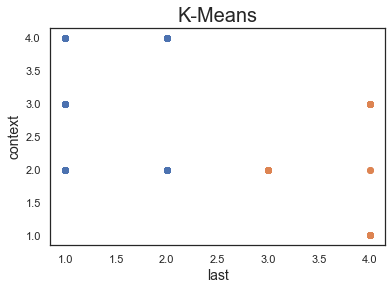

In [20]:
for i in range(jumlah_kluster):
  x1 = [hasilCluster[i][j][0] for j in range(len(Clusterke[i]))]
  x2 = [hasilCluster[i][j][1] for j in range(len(Clusterke[i]))]
  plt.plot(x1,x2,'o')
plt.xlabel("last",fontsize = 14)
plt.ylabel("context", fontsize = 14)
plt.title("K-Means", fontsize=20)